# Projeto 1 - Classificador Naive-Bayes com Tweets


## Objetivo

* Você foi contratado por uma empresa parar analisar como os clientes estão reagindo a um determinado produto no Twitter. A empresa deseja que você crie um programa selecionealgumas mensagens disponíveis no Twitter que mencionam esse produto e classifique-as como"relevante" ou "irrelevante".

* Com isso, essa empresa deseja que mensagens relevantes, que denigrem o nome do produto, ou que mereçam destaque, disparem um foco de atenção da área de marketing.

* Como aluno de Ciência dos Dados, você lembrou do Teorema de Bayes, mais especificamentedo Classificador Naive-Bayes, que é largamente utilizado em filtros anti-spam de e-mails, porexemplo. Esse classificador permite calcular qual a probabilidade de uma mensagem ser relevante dada as palavras em seu conteúdo.

* Para realizar o MVP (minimum viable product) do projeto, você precisa implementar umaversão do classificador que "aprende" o que é relevante com uma base de treinamento e compara a performance dos resultados com uma base de testes.

* Após validado, o seu protótipo poderá também capturar e classificar automaticamente as mensagens da plataforma.

## Integrantes do Projeto

**Nome:** Wilgner Lopes Araujo

**Nome:** Fabricio Neri Lima

## Informações relevantes

* Esse arquivo representa a ultima etapa do projeto onde haverá todas as etapas de cleaning da base de dados e implantação do algoritmo de classificação

* O arquivo que pesquisa os tweets esta na pasta Arquivo Jupyter/Projeto1_Obtenção_dos_tweets nessa mesma raiz do repositório

* A base de dados se encontra na pasta dados/Valorant.xlsx

* A conta utiliza no twitter para obtenção de dados é @AnalyticsInsper

* O produto escolhido para o projeto é o jogo : **Valorant**


## Critério de classificação dos tweets

Os criterios para a classificação dos tweets na primeira etapa do projeto foram: Os tweets que falavam de alguma forma **positiva ou negativa** sobre o jogo ou até mesmo que **relacionavam o jogo a alguma emoção**, como **raiva**, **felicidade** e etc., foram classificados como relevantes. Os demais foram classificados como Irrelevantes.


# Atenção!

Caso você não tenha instalado a biblioteca **emoji**, insira no seu Prompt de Comando **pip install emoji** ou rode a célula abaixo. Será uma biblioteca necessária para realizar a limpeza e separação dos emojis.

In [9]:
!pip install emoji

# Outras bibliotecas

As outras bibliotecas que iremos utilizar (functools, operator, re) já são default do Python (https://docs.python.org/3/py-modindex.html)

## Declarando as bibliotecas

In [2]:
#importando cada uma das bibliotecas que serão usadas
import math
import numpy as np
import pandas as pd
import re
import functools
import operator
import emoji

## Abrindo a base de dados e visualizando os primeiros 5 termos

In [3]:
#abrindo o arquivo de treino
dados = pd.read_excel('../dados/Valorant.xlsx')
dados.head()

,Treinamento,Etiquetas,Classificado
0,@caos__0 eu no valorant :v\nfon,2,Irrelevante
1,o cara q pra mim é o melhor player de valorant...,2,Irrelevante
2,mano algm upa meu passe no valorant na humildade,2,Irrelevante
3,"deletei o valorant, agora meu pc volta a ligar...",1,Relevante
4,quem tiver pc baixa valorant nessa porr que eu...,1,Relevante


## Informações do DataFrame

In [4]:
#lendo as informações da base de treino
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Treinamento   500 non-null    object
 1   Etiquetas     500 non-null    int64 
 2   Classificado  500 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.8+ KB


## Classificando 

* A coluna Treinamento e Classificado são categoricas, pois ambas são variaveis qualitativas nominais

In [5]:
#definindo como tipo como variáveis categóricas
dados['Treinamento'] = dados['Treinamento'].astype('category')
dados['Classificado'] = dados['Classificado'].astype('category')

## Iniciando as coletas de probabilidades

### Analisando frequencia de Relevante e Irrelevante na base de dados

In [6]:
#identificando as probabilidades de Relevante P(R) e probabilidade de Irrelevante P(R_c)
Probabilidade_total = dados.Classificado.value_counts(True)
Probabilidade_total

Irrelevante    0.542
Relevante      0.458
Name: Classificado, dtype: float64

## Declarando as variaveis de probabilidade

* Considere P(R) para probabilidade de ser Relevante
* Considere P(R_c) para probabilidade de ser Irrelevante

In [7]:
#Probabilidade de Irrelevantes
P_R_c = Probabilidade_total[0]
#Probabilidade de relevantes
P_R = Probabilidade_total[1]

## Antes de prosseguir vamos limpar o codigo

* Será removido os seguintes simbolos: ! - . : ? ; _ , < > / \ ] [ ) ( # % $ | \n 

Decidimos **não** retirar @ porque identificamos que a presença dele simboliza a interação com outros usuários, por isso o @ identificando os nickname dos usuários.

In [8]:
#Função utilizada para realizar a limpeza no Dataframe
def limpa_texto(text):
    
    #import string
    punctuation = '[!-.:?;_,<>/\][)(#%$|\n]' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, ' ', text)
    return text_subbed

## Alem disso vamos espaçar os emojis entre si

* O codigo utilizado foi extraido e modificado do seguinte site: https://stackoverflow.com/questions/49921720/how-to-split-emoji-from-each-other-python

* O codigo utiliza a biblioteca emoji, functools, operator para atingir o objetivo de separar os emojis

In [9]:
def separa_emoji(text):
    frase = text
    frase_split_emoji = emoji.get_emoji_regexp().split(frase)
    frase_split_com_espaço_em_branco = [substr.split() for substr in frase_split_emoji]
    frase_split = functools.reduce(operator.concat, frase_split_com_espaço_em_branco)
    frase_espacada = ' '.join(frase_split)
    return frase_espacada

## Aplicando a função de limpeza na base de dados

In [10]:
#Aplicando as funções no dataframe
dados['Treinamento'] = dados['Treinamento'].apply(limpa_texto)
dados['Treinamento'] = dados['Treinamento'].apply(separa_emoji)

In [11]:
# Checando se funcionou e se os emojis ainda funcionam
pd.set_option('max_colwidth', None)
dados.head(10)

,Treinamento,Etiquetas,Classificado
0,@caos 0 eu no valorant v fon,2,Irrelevante
1,o cara q pra mim é o melhor player de valorant do mundo joga osu,2,Irrelevante
2,mano algm upa meu passe no valorant na humildade,2,Irrelevante
3,deletei o valorant agora meu pc volta a ligar em 3 segundos,1,Relevante
4,quem tiver pc baixa valorant nessa porr que eu tô no ódio e vai ser o dia todo só isso,1,Relevante
5,voltei a jogar valorant so por causa do mata mata,1,Relevante
6,viciei em valorant esse é o tweet,1,Relevante
7,@zncabral free fire fez mais sucesso que o valorant só no brasil no resto do mundo quase ngm joga isso,1,Relevante
8,alguem me explica o motivo das 12 do valorant menos a shorty atirar tão bem de longe tipo comparando com cs e fortnite não faz sentido os cara vai de bucky atacando vai se fuder,1,Relevante
9,rt @leozjn o matchmaking do valorant n faz o minimo sentido,1,Relevante


## Preparação para fazer o smoothing

* Primeiro passo: Verificar a contagem de cada palavra no grupo de DataFrame Relevante e Irrelevante

In [12]:
# Separando o dataFrame em duas Strings com todas as palavras do grupo de Relevante e Irrelevante
dados_relevantes = dados[dados.Classificado == 'Relevante']
dados_irrelevantes = dados[dados.Classificado == 'Irrelevante']

# Transformando colunas em listas de palavras
# Transformando colunas em listas de palavras
palavras_relevantes = []
for i in (dados_relevantes.Treinamento.to_list()):
    for j in i.split():
        palavras_relevantes.append(j)
        
palavras_irrelevantes = []
for i in (dados_irrelevantes.Treinamento.to_list()):
    for j in i.split():
        palavras_irrelevantes.append(j)

# Contando aparição total das palavras
contagem_relevantes = pd.Series(palavras_relevantes).value_counts()
contagem_irrelevante = pd.Series(palavras_irrelevantes).value_counts()

# Somando total de contagens
N_relevante = contagem_relevantes.sum()
N_irrelevante = contagem_irrelevante.sum()



* Segundo passo: Aplicar o alfa nas contagem das palavras e o alfa x V no total de palavras 

In [13]:
#criando um alpha para realizar a técnica de smoothing
alfa = 0.01
#Criando um V para estimar o total de palavras da lingua 
V = 10e4

# Contagem + alfa
contagem_relevantes_com_alfa = contagem_relevantes + alfa
contagem_irrelevantes_com_alfa = contagem_irrelevante + alfa

# Total + alfaV
N_relevante_com_alfaV = N_relevante+alfa*V
N_irrelevante_com_alfaV = N_irrelevante+alfa*V


* Calculando probabilidade de cada palavra dada que é relevante e irrelevante



In [14]:
P_palavra_dado_relevante = contagem_relevantes_com_alfa/N_relevante_com_alfaV
P_palavra_dado_irrelevante = contagem_irrelevantes_com_alfa/N_irrelevante_com_alfaV


## O teorema de bayes requer as seguintes probabilidades

$P(Relevante|tweet)$:

$$P(Relevante|tweet) = \frac{P(tweet|Relevante) \cdot P(Relevante)}{P(tweet)}$$

Ou seja, precisamos de: 
- $P(tweet|Relevante)$: probabilidade de encontrar o tweet dado que ele é relevante;
- $P(tweet|Irrelevante)$: probabilidade de encontrar o tweet dado que ele é relevante;
- $P(Relevante)$:  probabilidade do tweet ser relevante;
- $P(Irrelevante)$: probabilidade do tweet ser irrelevante;
- $P(tweet)$: probabilidade de um tweet ocorrer na lingua portuguesa.


Para encontrar a probabilidade de $P(tweet|Relevante)$, temos que fazer:

$P(tweet | Relevante) = P(Palavra_1 | Relevante) \cdot P(Palavra_2 | Relevante) \cdot P(Palavra_3 | Relevante) \cdot ... P(Palavra_n | Relevante)$

Contudo, como as probabilidades são muito pequenas, basta fazer a soma dos expoentes. Logo, basta aplicar logaritmo:

$log(P(tweet | Relevante)) = 
log(P(Palavra_1 | Relevante)) + log(P(Palavra_2 | Relevante)) + ... log(P(Palavra_n | Relevante))$

Dessa forma, aplicando o log, temos que: 

$log(P(Relevante|tweet)) = \frac{log(P(palavra_1|Relevante)) + log(P(palavra_2|Relevante)) + log(P(palavra_3|Relevante)) + log(P(palavra_4|Relevante)) + log(P(Relevante))}{P(tweet)}$

Como iremos realizar a comparação entre $P(Relevante|Tweet)$ e $P(Irrelevante|Tweet)$, não é necessário se preocupar com a divisão ou a subtração pelo $P(Tweet)$, se aplicarmos $log$, pois esse termo se cancelará.

## Calculando a coluna de probabilidade relevante

In [15]:
#valor inicial
frase = 0

tabela_relevante = dict()

probabilidade_da_frase = 0

#para cada um dos índices da tabela de tweets
for indice in range(len(dados)):
    
    frase = dados.iloc[indice,0]
    #divide o tweet em uma lista de palavras que compõem o tweet
    palavras_da_frase = frase.split()
    
    for palavra in palavras_da_frase:
    #faz o cálculo da probabilidade de CADA palavra    
        
        if palavra in palavras_relevantes:
        #se for uma palavra conhecida entre as palavras presentes nos tweets relevantes
            probabilidade_da_palavra = P_palavra_dado_relevante[palavra]
            #como estamos apenas pegando os expoentes, estamos somando
            probabilidade_da_frase += (math.log10(probabilidade_da_palavra))
            
        else:
        #se for uma palavra desconhecida entre a lista das palavras presentes nos tweets relevantes
        
            probabilidade_da_palavra = alfa/N_relevante_com_alfaV
            #como estamos apenas pegando os expoentes, estamos somando
            probabilidade_da_frase += (math.log10(probabilidade_da_palavra))
    
    #adiciona a um dicionario em que a chave é o tweet e o item é a probabilidade dele
    tabela_relevante[frase] = (probabilidade_da_frase)
    probabilidade_da_frase = 0
    
df = pd.DataFrame.from_dict(data = tabela_relevante, orient='index').reset_index()
df.columns = ['Tweet', 'Probabilidade dado que é relevante']
df.head()

,Tweet,Probabilidade dado que é relevante
0,@caos 0 eu no valorant v fon,-25.273963
1,o cara q pra mim é o melhor player de valorant do mundo joga osu,-38.253306
2,mano algm upa meu passe no valorant na humildade,-30.730666
3,deletei o valorant agora meu pc volta a ligar em 3 segundos,-31.863898
4,quem tiver pc baixa valorant nessa porr que eu tô no ódio e vai ser o dia todo só isso,-51.329158


## Calculando a coluna de probabilidade irrelevante

Assim como feito para os Relevantes, iremos repetir o processo para os Irrelevantes

In [16]:
frase = 0
tabela_irrelevante = dict()
#iniciando a probabilidade em 1
probabilidade_da_frase = 0

for indice in range(len(dados)):
    #para cada índice (linha) na planilha dados
    frase = dados.iloc[indice,0]
    #criando uma lista com as palavras presentes no tweet separadas individualmente
    palavras_da_frase = frase.split()

    for palavra in palavras_da_frase:
        #calculando a probabilidade de cada palavra
        
        if palavra in palavras_irrelevantes:
            #se a palavra estiver entre todas as palavras presentes no grupo de palavras irrelevantes

            probabilidade_da_palavra = P_palavra_dado_irrelevante[palavra]
             #somando os expoentes da probabilidade de cada palavra
            probabilidade_da_frase += (math.log10(probabilidade_da_palavra))
            
        else:
            #se a palavra não for uma das presentes no grupo de palavras irrelevantes
            probabilidade_da_palavra = alfa/N_irrelevante_com_alfaV
            #somando os expoentes da probabilidade de cada palavra
            probabilidade_da_frase += (math.log10(probabilidade_da_palavra))
        
        
        
    #salvando a probabilidade do tweet   
    tabela_irrelevante[frase] = (probabilidade_da_frase)
    
    #reiniciando a contagem da probabilidade para o próximo tweet
    probabilidade_da_frase = 0
    
df1 = pd.DataFrame.from_dict(data = tabela_irrelevante, orient='index').reset_index()
df1.columns = ['Tweet', 'Probabilidade dado que é irrelevante']
df1.head()


,Tweet,Probabilidade dado que é irrelevante
0,@caos 0 eu no valorant v fon,-19.200265
1,o cara q pra mim é o melhor player de valorant do mundo joga osu,-37.209034
2,mano algm upa meu passe no valorant na humildade,-26.266810
3,deletei o valorant agora meu pc volta a ligar em 3 segundos,-42.443115
4,quem tiver pc baixa valorant nessa porr que eu tô no ódio e vai ser o dia todo só isso,-62.116478


## Juntando resultados

In [17]:
novodf = pd.concat([dados, df['Probabilidade dado que é relevante'], df1['Probabilidade dado que é irrelevante']], axis=1)

In [18]:
novodf.head()

,Treinamento,Etiquetas,Classificado,Probabilidade dado que é relevante,Probabilidade dado que é irrelevante
0,@caos 0 eu no valorant v fon,2,Irrelevante,-25.273963,-19.200265
1,o cara q pra mim é o melhor player de valorant do mundo joga osu,2,Irrelevante,-38.253306,-37.209034
2,mano algm upa meu passe no valorant na humildade,2,Irrelevante,-30.730666,-26.266810
3,deletei o valorant agora meu pc volta a ligar em 3 segundos,1,Relevante,-31.863898,-42.443115
4,quem tiver pc baixa valorant nessa porr que eu tô no ódio e vai ser o dia todo só isso,1,Relevante,-51.329158,-62.116478


## Aplicando calculo final

$log(P(tweet|Relevante)) + log(P(Relevante))$ e $log(P(tweet|Irrelevante)) + log(P(irrelevante))$

Lembrando que não precisamos realizar a operação de divisão, visto que ambos seriam divididos pela mesma coisa, e como queremos compará-los, não mudaria em nada a comparação.

In [19]:
#realizando a operação
novodf['Probabilidade dado relevante x Probabilidade de Relevante'] = novodf['Probabilidade dado que é relevante']+math.log10(P_R)
novodf['Probabilidade dado irrelevante x Probabilidade de Irelevante'] = novodf['Probabilidade dado que é irrelevante']+math.log10(P_R_c)

In [20]:
novodf.head(10)

,Treinamento,Etiquetas,Classificado,Probabilidade dado que é relevante,Probabilidade dado que é irrelevante,Probabilidade dado relevante x Probabilidade de Relevante,Probabilidade dado irrelevante x Probabilidade de Irelevante
0,@caos 0 eu no valorant v fon,2,Irrelevante,-25.273963,-19.200265,-25.613098,-19.466266
1,o cara q pra mim é o melhor player de valorant do mundo joga osu,2,Irrelevante,-38.253306,-37.209034,-38.592440,-37.475035
2,mano algm upa meu passe no valorant na humildade,2,Irrelevante,-30.730666,-26.266810,-31.069801,-26.532811
3,deletei o valorant agora meu pc volta a ligar em 3 segundos,1,Relevante,-31.863898,-42.443115,-32.203033,-42.709115
4,quem tiver pc baixa valorant nessa porr que eu tô no ódio e vai ser o dia todo só isso,1,Relevante,-51.329158,-62.116478,-51.668293,-62.382479
5,voltei a jogar valorant so por causa do mata mata,1,Relevante,-25.124339,-32.271004,-25.463474,-32.537005
6,viciei em valorant esse é o tweet,1,Relevante,-17.396146,-21.958386,-17.735281,-22.224387
7,@zncabral free fire fez mais sucesso que o valorant só no brasil no resto do mundo quase ngm joga isso,1,Relevante,-54.537908,-68.385175,-54.877043,-68.651176
8,alguem me explica o motivo das 12 do valorant menos a shorty atirar tão bem de longe tipo comparando com cs e fortnite não faz sentido os cara vai de bucky atacando vai se fuder,1,Relevante,-98.134537,-118.710855,-98.473671,-118.976856
9,rt @leozjn o matchmaking do valorant n faz o minimo sentido,1,Relevante,-29.107860,-35.884930,-29.446994,-36.150930


## Aplicando:

Se $P(Relevante|tweet) < P(Irrelevante|tweet)$, classificaremos o tweet como Relevante (Como estamos verificando o expoente das probabilidades e eles são números muito pequenos (expoente negativo), queremos o expoente mais próximo de 0), senão, classificaremos como Irrelevante.

In [21]:
#comparando os dados obtidos anteriomente e realizando a classificação
novodf['Navy Bayes'] = np.where(novodf['Probabilidade dado relevante x Probabilidade de Relevante'] > novodf['Probabilidade dado irrelevante x Probabilidade de Irelevante'], 'Relevante', 'Irrelevante')
novodf.head()

,Treinamento,Etiquetas,Classificado,Probabilidade dado que é relevante,Probabilidade dado que é irrelevante,Probabilidade dado relevante x Probabilidade de Relevante,Probabilidade dado irrelevante x Probabilidade de Irelevante,Navy Bayes
0,@caos 0 eu no valorant v fon,2,Irrelevante,-25.273963,-19.200265,-25.613098,-19.466266,Irrelevante
1,o cara q pra mim é o melhor player de valorant do mundo joga osu,2,Irrelevante,-38.253306,-37.209034,-38.592440,-37.475035,Irrelevante
2,mano algm upa meu passe no valorant na humildade,2,Irrelevante,-30.730666,-26.266810,-31.069801,-26.532811,Irrelevante
3,deletei o valorant agora meu pc volta a ligar em 3 segundos,1,Relevante,-31.863898,-42.443115,-32.203033,-42.709115,Relevante
4,quem tiver pc baixa valorant nessa porr que eu tô no ódio e vai ser o dia todo só isso,1,Relevante,-51.329158,-62.116478,-51.668293,-62.382479,Relevante


## Resultados

Para obtermos os resultados, vamos comparar a classificação manual com a classificação pelo nosso modelo de MVP utilizando o pandas Crosstab

In [22]:
novodf['Navy Bayes'].value_counts()

Irrelevante    271
Relevante      229
Name: Navy Bayes, dtype: int64

In [23]:
tabela = pd.crosstab(novodf.Classificado, novodf['Navy Bayes'], normalize=True)
tabela

Navy Bayes,Irrelevante,Relevante
Classificado,,
Irrelevante,0.542,0.000
Relevante,0.000,0.458


In [24]:
verdadeiros_positivos = tabela.iloc[1,1]*100
falsos_positivos = tabela.iloc[1,0]*100
verdadeiros_negativos = tabela.iloc[0,0]*100
falsos_negativos = tabela.iloc[0,1]*100

print('A porcentagem de verdadeiros positivos é: {:.3f}%\n'.format(verdadeiros_positivos))
print('A porcentagem de falsos positivos é: {:.3f}%\n'.format(falsos_positivos))
print('A porcentagem de verdadeiros negativos é: {:.3f}%\n'.format(verdadeiros_negativos))
print('A porcentagem de falsos negativos é: {:.3f}%\n'.format(falsos_negativos))

A porcentagem de verdadeiros positivos é: 45.800%

A porcentagem de falsos positivos é: 0.000%

A porcentagem de verdadeiros negativos é: 54.200%

A porcentagem de falsos negativos é: 0.000%



In [25]:
precisao = (tabela.iloc[0,0] + tabela.iloc[1,1])*100
precisao

100.0

# Teste

A partir deste ponto, iremos aplicar o nosso modelo na planilha de teste, para verificar o quão bom é o modelo.

In [26]:
#lendo a planilha teste
teste = pd.read_excel('../dados/Valorant.xlsx', sheet_name = 'Teste')
teste['Classificado'] = teste['Classificado'].astype('category')
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Teste         47 non-null     object  
 1   Etiquetas     47 non-null     int64   
 2   Classificado  47 non-null     category
dtypes: category(1), int64(1), object(1)
memory usage: 1023.0+ bytes


* Limpando o Teste

In [27]:
teste['Teste'] = teste['Teste'].apply(limpa_texto)
teste['Teste'] = teste['Teste'].apply(separa_emoji)
teste.head()

,Teste,Etiquetas,Classificado
0,mt silverio abandona a carreira como dj e vira pro player de valorant em breve nos cinemas,2,Irrelevante
1,definitivamente o valorant n quer mais me ver jogar é cada bronze com jogatina de imortal q pelamor,1,Relevante
2,eu jogando valorant com meus amigos eu jogando valorant sozinho https t co esjhdslejb,2,Irrelevante
3,eu sei que a minha equipa no valorant é má quando sou eu a top fragger,2,Irrelevante
4,baixei valorant esse foi o erro da noite kkk,1,Relevante


### Checa relevante

Vamos realizar o mesmo procedimento de passar pelas tweets e verificarmos a probabilidade deles dado que são relevantes. 

In [28]:
frase = 0

tabela_relevante = dict()

#iniciando a probabilidade como 0
probabilidade_da_frase = 0
for indice in range(len(teste)):
    #passando de linha em linha
    frase = teste.iloc[indice,0]
    #dividindo cada tweet de palavra em palavra
    palavras_da_frase = frase.split()
    
    for palavra in palavras_da_frase:
    #para cada palavra presente no tweet, verificar se ela pertence a base das palavras relevantes    
        
        if palavra in palavras_relevantes:
        #se for uma palavra presente dentre as relevantes, realiza o cálculo utilizando o valor dela + alpha
            probabilidade_da_palavra = P_palavra_dado_relevante[palavra]
            
            probabilidade_da_frase += (math.log10(probabilidade_da_palavra))
            
        else:
            #se não estiver presente dentre as palavras relevantes,realiza o cálculo apenas com o alpha
            probabilidade_da_palavra = alfa/N_relevante_com_alfaV
            probabilidade_da_frase += (math.log10(probabilidade_da_palavra))
        
        
        
    #guarda o valor da probabilidade do tweet 
    tabela_relevante[frase] = (probabilidade_da_frase)
    probabilidade_da_frase = 0
    
df = pd.DataFrame.from_dict(data = tabela_relevante, orient='index').reset_index()
df.columns = ['Tweet', 'Probabilidade dado que é relevante']
df.head()


,Tweet,Probabilidade dado que é relevante
0,mt silverio abandona a carreira como dj e vira pro player de valorant em breve nos cinemas,-60.674475
1,definitivamente o valorant n quer mais me ver jogar é cada bronze com jogatina de imortal q pelamor,-53.803225
2,eu jogando valorant com meus amigos eu jogando valorant sozinho https t co esjhdslejb,-36.368891
3,eu sei que a minha equipa no valorant é má quando sou eu a top fragger,-45.783256
4,baixei valorant esse foi o erro da noite kkk,-28.522927


### Checa Irrelevante

In [28]:
frase = 0
tabela_irrelevante = dict()

#inicializando a probabilidade em 0
probabilidade_da_frase = 0
#percorrendo cada uma das linhas da planilha
for indice in range(len(teste)):
    frase = teste.iloc[indice,0]
    #dividindo cada tweet em uma lista com as palavras separadas individualmente
    palavras_da_frase = frase.split()

    for palavra in palavras_da_frase:
        
        if palavra in palavras_irrelevantes:
        #se a palavra for uma das presentes no grupo de palavras irrelevantes, realiza o cálculo com ela + alpha
            probabilidade_da_palavra = P_palavra_dado_irrelevante[palavra]
            probabilidade_da_frase += (math.log10(probabilidade_da_palavra))
            
        else:
            # se a palavra não estiver presente no grupo de palavras irrelevantes, realiza o cálculo apenas com o apha
            probabilidade_da_palavra = alfa/N_irrelevante_com_alfaV
            probabilidade_da_frase += (math.log10(probabilidade_da_palavra))
    #guarda a probabilidade do tweet      
    tabela_irrelevante[frase] = (probabilidade_da_frase)
    probabilidade_da_frase = 0
    
df1 = pd.DataFrame.from_dict(data = tabela_irrelevante, orient='index').reset_index()
df1.columns = ['Tweet', 'Probabilidade dado que é irrelevante']
df1.head()


,Tweet,Probabilidade dado que é irrelevante
0,mt silverio abandona a carreira como dj e vira pro player de valorant em breve nos cinemas,-50.555260
1,definitivamente o valorant n quer mais me ver jogar é cada bronze com jogatina de imortal q pelamor,-56.203358
2,eu jogando valorant com meus amigos eu jogando valorant sozinho https t co esjhdslejb,-37.777941
3,eu sei que a minha equipa no valorant é má quando sou eu a top fragger,-46.205584
4,baixei valorant esse foi o erro da noite kkk,-30.166798


### Junta resultados

In [29]:
#juntando os resultados obtidos
novodf2 = pd.concat([teste, df['Probabilidade dado que é relevante'], df1['Probabilidade dado que é irrelevante']], axis=1)
novodf2.head()

,Teste,Etiquetas,Classificado,Probabilidade dado que é relevante,Probabilidade dado que é irrelevante
0,mt silverio abandona a carreira como dj e vira pro player de valorant em breve nos cinemas,2,Irrelevante,-60.674475,-50.555260
1,definitivamente o valorant n quer mais me ver jogar é cada bronze com jogatina de imortal q pelamor,1,Relevante,-53.803225,-56.203358
2,eu jogando valorant com meus amigos eu jogando valorant sozinho https t co esjhdslejb,2,Irrelevante,-36.368891,-37.777941
3,eu sei que a minha equipa no valorant é má quando sou eu a top fragger,2,Irrelevante,-45.783256,-46.205584
4,baixei valorant esse foi o erro da noite kkk,1,Relevante,-28.522927,-30.166798


### Gera coluna final para analise

In [30]:
#realizando o último procedimento de cálculo
novodf2['Probabilidade dado relevante x Probabilidade de Relevante'] = novodf2['Probabilidade dado que é relevante']+math.log10(P_R)
novodf2['Probabilidade dado irrelevante x Probabilidade de Irrelevante'] = novodf2['Probabilidade dado que é irrelevante']+math.log10(P_R_c)
novodf2.head()

,Teste,Etiquetas,Classificado,Probabilidade dado que é relevante,Probabilidade dado que é irrelevante,Probabilidade dado relevante x Probabilidade de Relevante,Probabilidade dado irrelevante x Probabilidade de Irrelevante
0,mt silverio abandona a carreira como dj e vira pro player de valorant em breve nos cinemas,2,Irrelevante,-60.674475,-50.555260,-61.013610,-50.821261
1,definitivamente o valorant n quer mais me ver jogar é cada bronze com jogatina de imortal q pelamor,1,Relevante,-53.803225,-56.203358,-54.142360,-56.469358
2,eu jogando valorant com meus amigos eu jogando valorant sozinho https t co esjhdslejb,2,Irrelevante,-36.368891,-37.777941,-36.708025,-38.043942
3,eu sei que a minha equipa no valorant é má quando sou eu a top fragger,2,Irrelevante,-45.783256,-46.205584,-46.122391,-46.471585
4,baixei valorant esse foi o erro da noite kkk,1,Relevante,-28.522927,-30.166798,-28.862062,-30.432799


### Aplica Navy-Bayes

In [31]:
#aplicando a compararação para verificar qual é relevante e qual é o irrelevante de acordo com as probabilidades
novodf2['Navy Bayes'] = np.where(novodf2['Probabilidade dado relevante x Probabilidade de Relevante'] > novodf2['Probabilidade dado irrelevante x Probabilidade de Irrelevante'], 'Relevante', 'Irrelevante')
novodf2.tail(40)

,Teste,Etiquetas,Classificado,Probabilidade dado que é relevante,Probabilidade dado que é irrelevante,Probabilidade dado relevante x Probabilidade de Relevante,Probabilidade dado irrelevante x Probabilidade de Irrelevante,Navy Bayes
7,eu n ganhei u m a partida hohe no valorant uma uma uma n ganhei umaaaaaa,1,Relevante,-55.455868,-57.296645,-55.795002,-57.562646,Relevante
8,rt @hellzfps as skins spline do valorant parecem aquele arame de amarrar embalagem de pão fatiado e eu posso provar https t co xfdusm9qvt,1,Relevante,-89.410577,-91.799150,-89.749711,-92.065151,Relevante
9,minha muie aprendendo a joga valorant as 3 da manha enquanto eu morro de rinite no fundo https t co vukpcq6msj,2,Irrelevante,-68.772814,-72.191317,-69.111949,-72.457318,Relevante
10,bom dia hoje eu hard vou produzir um conteúdo diferenciado o que acontece quando você joga bêbado valorant querem saber mais esperem mais tarde 😁,1,Relevante,-91.334275,-89.688961,-91.673410,-89.954962,Irrelevante
11,abre o valorant pra se divertir um tico depois dum dia cansativo gt cai na partida com um cara abre o microfone pra arrotar,1,Relevante,-86.241571,-78.985521,-86.580705,-79.251522,Irrelevante
12,desgraça só pego gente enviada pelo maligno pra jogar cmg n valorant pq pqp não tem como ser tão horríveis vai tomar no cu,1,Relevante,-77.328340,-80.152448,-77.667474,-80.418448,Relevante
13,valorant o jogo do amor,1,Relevante,-10.741936,-11.208343,-11.081070,-11.474344,Relevante
14,finalmente vou conseguir valorant 🙏 🙏 finalmente os mimos 🙏,1,Relevante,-37.578601,-41.326772,-37.917735,-41.592773,Relevante
15,tô curtindo o valorant,1,Relevante,-11.734413,-11.920666,-12.073548,-12.186666,Relevante
16,rt @relatosfrases quem joga valorant bora jogar uma agora,2,Irrelevante,-28.037218,-25.541208,-28.376353,-25.807209,Irrelevante


## Verificando o resultado do teste

In [32]:
novodf2['Navy Bayes'].value_counts()

Relevante      31
Irrelevante    16
Name: Navy Bayes, dtype: int64

In [44]:
#comparando os resultados da classicação entre o manual e o Navy Bayes por meio do CrossTab
tabela2 = pd.crosstab(novodf2.Classificado, novodf2['Navy Bayes'], normalize = True)
tabela2


Navy Bayes,Irrelevante,Relevante
Classificado,,
Irrelevante,0.255319,0.191489
Relevante,0.085106,0.468085


In [34]:
verdadeiros_positivos2 = tabela2.iloc[1,1]*100
falsos_positivos2 = tabela2.iloc[1,0]*100
verdadeiros_negativos2 = tabela2.iloc[0,0]*100
falsos_negativos2 = tabela2.iloc[0,1]*100

print('A porcentagem de verdadeiros positivos é: {:.3f}%\n'.format(verdadeiros_positivos2))
print('A porcentagem de falsos positivos é: {:.3f}%\n'.format(falsos_positivos2))
print('A porcentagem de verdadeiros negativos é: {:.3f}%\n'.format(verdadeiros_negativos2))
print('A porcentagem de falsos negativos é: {:.3f}%\n'.format(falsos_negativos2))

A porcentagem de verdadeiros positivos é: 46.809%

A porcentagem de falsos positivos é: 8.511%

A porcentagem de verdadeiros negativos é: 25.532%

A porcentagem de falsos negativos é: 19.149%



In [35]:
precisao = tabela2.iloc[0,0] + tabela2.iloc[1,1]
print('A precisão é de {:.2f}%'.format(precisao*100))

A precisão é de 72.34%


## Conclusão

- ### Avaliação da perfomance

O classificador obteve um uma taxa de 72,34% de acertos. Apesar de ter uma taxa de 28% de erro, aproximadamente, o classificador é relativamente bom, porque ele tem 25.532% de verdadeiros negativos e 46.809% de verdadeiros positivos, enquanto tem 19.149% de falsos negativos e 8.511% falsos positivos. Concluindo, devido a taxa de aproximadamente 3/4 de acertos do teste, e levando em consideração que o número de tweets relevantes e irrelevantes que foram classificados manualmente estão proporcionalmente parecidos ( 26 tweets relevantes e 21 tweets irrelevantes), ele é um bom classificador.


- ### Como são tradadas as mensagens de dupla negação ou sarcasmo

As mensagens de sarcamos e duplo sentido não tem sua conotação interpretada pelo Naive Bayes. Ele apenas leva em consideração cada palavra como algo independente, então o contexto é ignorado e assim o sarcasmo e duplo sentido também.

- ### Plano de Expansão

Atualmente, com o nosso projeto é possível identificar tweets que demonstram algum sentimento sobre o jogo valorant, mesmo que seja um sentimento bom ou um ruim. A partir disso, uma possível expansão seria dividir os tweets classificados em relevantes em "Bom" e "Ruim", porque assim a empresa Riot Games, desenvolvedora do jogo, conseguiria entender quais são as críticas e quais os elogios que recebem sobre o seu jogo.

- ### Sugerir melhorias

Para que o classificador tenha uma melhor performance, é necessário que ele sofra algumas mudanças, como não considerar cada palavra como independente. Realizar a probabilidade de uma dupla de palavras como se fosse uma só seria uma possibilidade de melhora, visto que isso facilitaria na identificação do contexto de cada tweet.

Outra possibilidade de melhoria seria trocar o Navy Bayes pelo GPT-3, uma inteligência artificial com número bem maior de parâmetros. Ao usar o GPT-3, devido ao seu número maior de parâmetros, a número de palavras desconhecidas seria bem menor, e isso ajudaria na hora do cálculo de probabilidades e da classificação.



- ### Motivo de não poder usar o classificador para aumentar a amostra de treinamento.

Não se pode usar o classificador para aumentar o número de amostras do treinamento porque como ficou evidente no teste, ele erra parte das classificações. Assim, se utilizarmos a o classificador para aumentar o número de amostras, ele classificaria parte delas errado, e em futuras classificações, ele obteria a probabilidade das palavras errada, já que a sua classificação teve erros, gerando um ciclo e aumentando gradualmente a imprecisão do modelo.


- ### Aplicações

O classificador Naive Bayes pode ser utilizado em diversos contextos, como:

No jogo do prêmio escondido atrás de uma porta em que o jogador precisa escolher a porta, jogo comum em programas de televisão, o Naive Bayes pode ser aplicado pra descobrir a probabilidade de o prêmio estar atrás da porta dado que o apresentador perguntou se o jogador quer trocar de porta.

Descobrir se você está com uma doença dado que um exame foi positivo (Isso porque existe a probabilidade do exame estar errado)

Verificar se um e-mail é ou não spam

## Graficos comparativo

* Fonte utilizada para elaboração de graficos agrupados: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

* Fonte utilizada para customizar anotações: https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.annotate.html

### Grafico do Treinamento

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

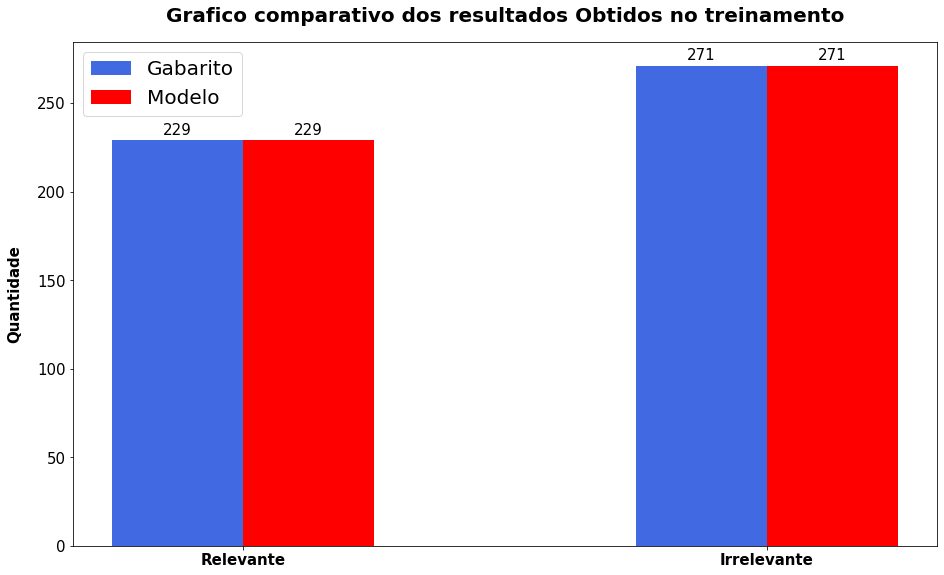

In [37]:
gabarito = novodf.Classificado.value_counts()
treino = novodf['Navy Bayes'].value_counts()

fig = plt.figure(figsize=(12,7))

ax = fig.add_axes([0,0,1,1])

relevante_gabarito = [gabarito[1], gabarito[0]]
relevante_algoritmo = [treino[1], treino[0]]


label = ['Relevante', 'Irrelevante']
x = np.arange(len(label))
largura = 0.25

rects1 = ax.bar(x - largura/2, relevante_gabarito, largura, label="Gabarito", color='royalblue')
rects2 = ax.bar(x + largura/2, relevante_algoritmo, largura, label="Modelo", color='red')

ax.set_title('Grafico comparativo dos resultados Obtidos no treinamento', fontsize=20, pad=20, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=15, labelpad=15, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(label, fontsize=20, fontweight='bold')
ax.tick_params(labelsize=15)
ax.legend(fontsize=20)

def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=15)

autolabel(rects1)
autolabel(rects2)


### Grafico do Teste

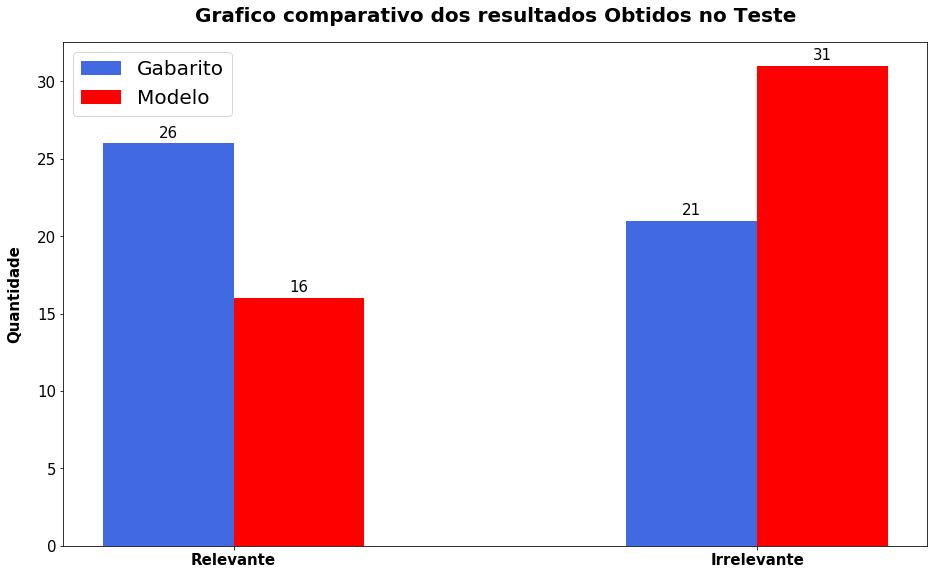

In [38]:
gabarito2 = novodf2.Classificado.value_counts()
teste2 = novodf2['Navy Bayes'].value_counts()


fig = plt.figure(figsize=(12,7))

ax = fig.add_axes([0,0,1,1])

relevante_gabarito2 = [gabarito2[1], gabarito2[0]]
relevante_algoritmo2 = [teste2[1], teste2[0]]


label = ['Relevante', 'Irrelevante']
x = np.arange(len(label))
largura = 0.25

rects12 = ax.bar(x - largura/2, relevante_gabarito2, largura, label="Gabarito", color='royalblue')
rects22 = ax.bar(x + largura/2, relevante_algoritmo2, largura, label="Modelo", color='red')

ax.set_title('Grafico comparativo dos resultados Obtidos no Teste', fontsize=20, pad=20, fontweight='bold')
ax.set_ylabel('Quantidade', fontsize=15, labelpad=15, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(label, fontsize=20, fontweight='bold')
ax.tick_params(labelsize=15)
ax.legend(fontsize=20)

def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=15)

autolabel(rects12)
autolabel(rects22)

plt.show()

# Referências


- https://semantix.com.br/10-algoritmos-de-machine-learning-que-voce-precisa-conhecer/
- https://www.voitto.com.br/blog/artigo/teorema-de-bayes
- https://semantix.com.br/10-algoritmos-de-machine-learning-que-voce-precisa-conhecer/